In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [50]:
print(
    min(r1_guesses)
)

41.70866233872478


In [81]:
target = 50 # function variable
initial_min = 1
initial_max = 100
n_guesses = 25
coefficient = 10

def shoot(target, initial_min, initial_max, n_guesses, coefficient):
    margin = (initial_max - initial_min)/coefficient
    guesses = np.random.uniform(initial_min, initial_max, n_guesses)
    refined_guesses = []

    for guess in guesses:
        if abs(guess - target) < margin: # less than a certain margin off, zoom in
            refined_guesses.append(guess)



    return np.array(refined_guesses)

# r1_guesses = shoot(target, initial_min, initial_max, n_guesses, coefficient)
# r2_guesses = shoot(target, min(r1_guesses), max(r1_guesses), n_guesses, coefficient)

# test = {
#     'r1': r1_guesses,
#     'r2': r2_guesses
#     }

# labels, data = test.keys(), test.values()
# plt.boxplot(data)
# plt.xticks(range(1, len(labels) + 1), labels)

# plt.show()


In [82]:
def shootwrapper(target, initial_min, initial_max, n_guesses, coefficient, depth=0, max_depth=10, results=None):
    if depth == 0:
        results = {}  # Initialize the results dictionary at the top level call

    if depth >= max_depth:
        print(f"Maximum depth of {max_depth} reached.")
        return results

    guesses = shoot(target, initial_min, initial_max, n_guesses, coefficient)
    round_key = f'r{depth + 1}'
    if len(guesses) > 0:
        results[round_key] = guesses

    # Base case: No guesses are within the margin, or we've refined to the maximum depth
    if len(guesses) == 0:
        print(f"No more refinement possible after {depth} rounds.")
        return results

    # Prepare for the next recursive call
    new_min, new_max = min(guesses), max(guesses)
    return shootwrapper(target, new_min, new_max, n_guesses, coefficient, depth + 1, max_depth, results)


In [83]:
res = shootwrapper(target, initial_min, initial_max, n_guesses, coefficient)

No more refinement possible after 4 rounds.


In [87]:
print(res)

{'r1': array([56.1503511 , 43.93211448, 51.12378866, 52.17096546, 45.54837392]), 'r2': array([48.80903016, 50.12783322, 49.2317282 , 49.0662299 , 50.39473296,
       51.0147463 ]), 'r3': array([49.81206282, 50.03138134, 50.05294559, 49.85589868]), 'r4': array([50.00982854, 50.01896152])}


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U2'), dtype('<U2')) -> None

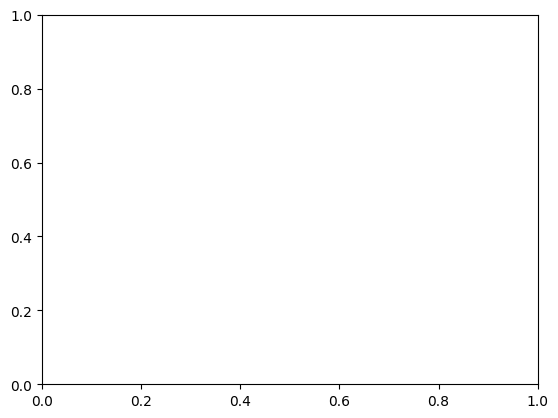

In [86]:
data, labels = res.keys(), res.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

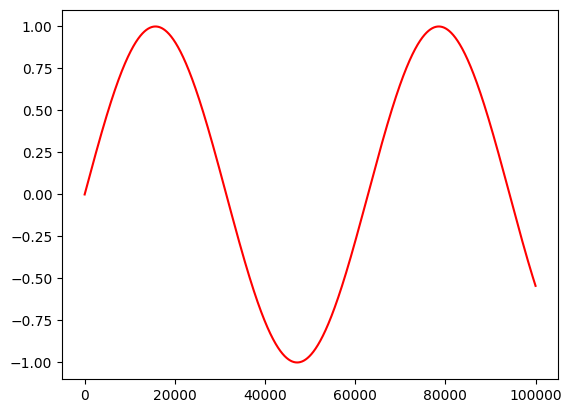

In [146]:
a = np.sin(np.linspace(0, 10, 99999))
plt.plot(a, 'r')
plt.show()

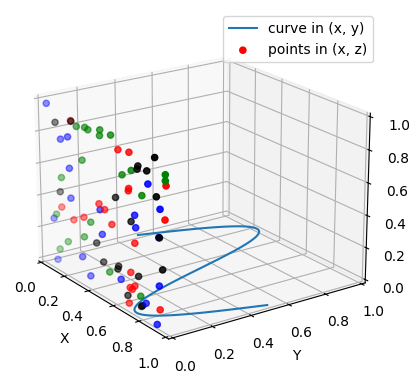

In [175]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels

ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

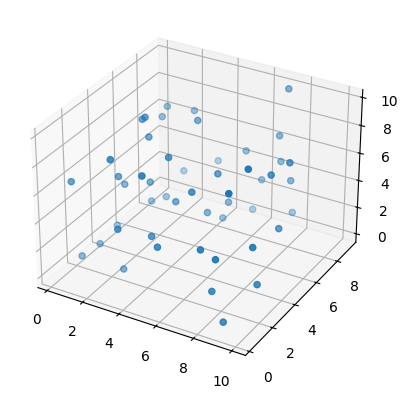

In [120]:
n = 50
x = np.random.uniform(0, 10, n)
y = np.random.uniform(0, 10, n)
z = np.random.uniform(0, 10, n)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x, y, z)

zipped = zip(x, y)

In [150]:
def generate_random_points(l_bound, u_bound, n_points):
    x = np.random.uniform(l_bound, u_bound, n_points)
    y = np.random.uniform(l_bound, u_bound, n_points)

    return zip(x, y)

def plot_coordinate(coordinate, color = 'r'):
    plt.plot(coordinate[0], coordinate[1], f'{color}o')

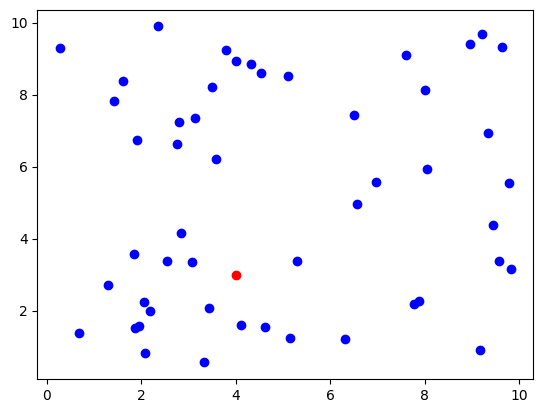

In [151]:
point = (4, 3)
plot_coordinate(point)

random_points = generate_random_points(0, 10, 50)

for p in random_points:
    plot_coordinate(p, 'b')

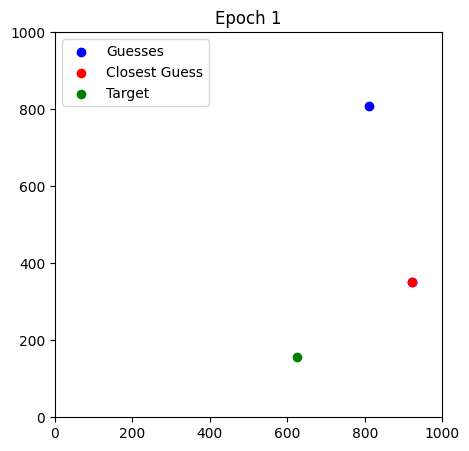

Epoch 1: Closest guess is (921.5285817033767, 350.66001142721615) with distance 355.54996411090644


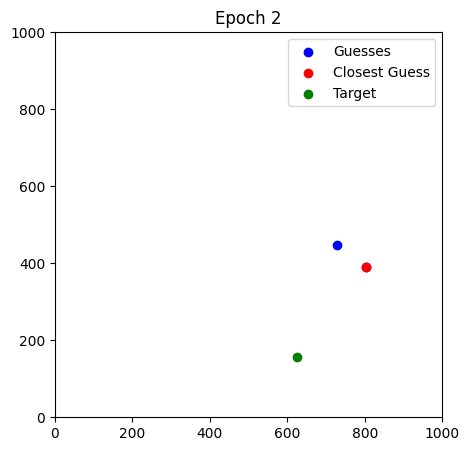

Epoch 2: Closest guess is (803.436645700562, 390.0575591091019) with distance 294.92448320948154


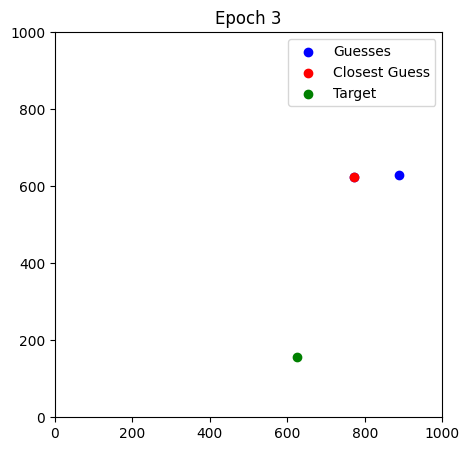

Epoch 3: Closest guess is (771.9081110135543, 623.315572898409) with distance 490.16390521637356


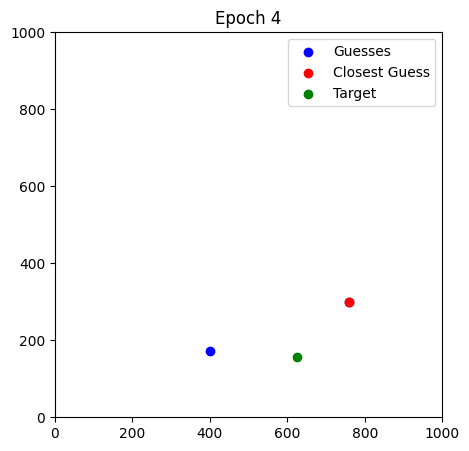

Epoch 4: Closest guess is (760.0883249786833, 300.1648678610059) with distance 198.25120761519972


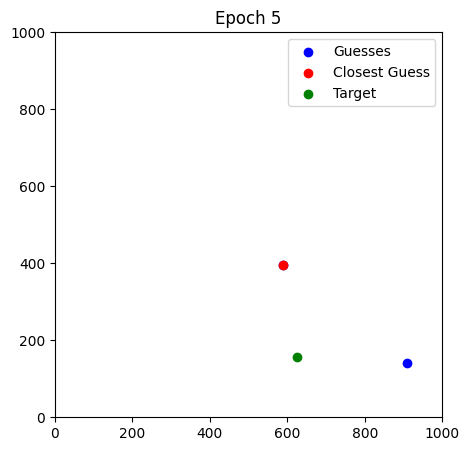

Epoch 5: Closest guess is (589.9942783073686, 394.82394103341954) with distance 241.23280025438282


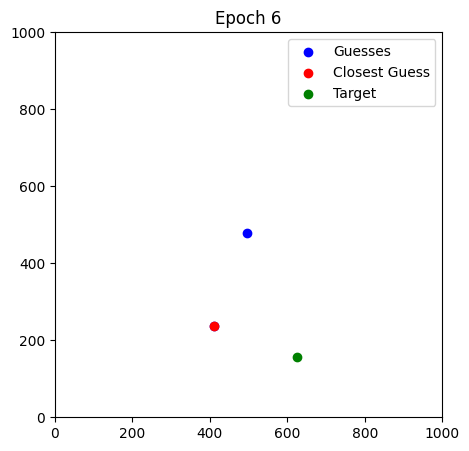

Epoch 6: Closest guess is (410.08871754774475, 236.19305375678917) with distance 228.44903727354117


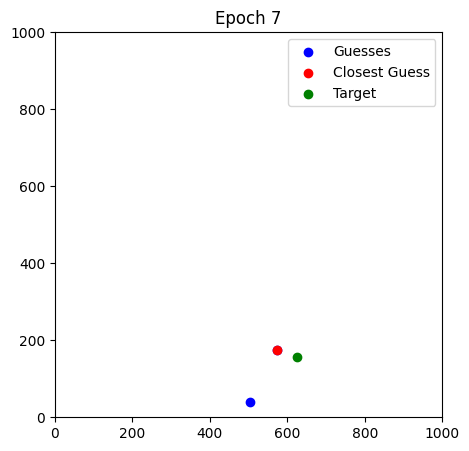

Epoch 7: Closest guess is (572.0902358630675, 175.8702968524287) with distance 55.58284186469419


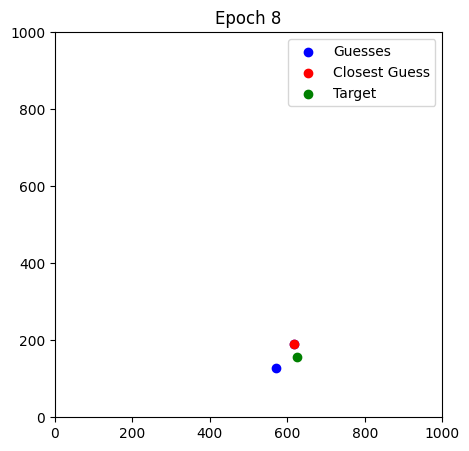

Epoch 8: Closest guess is (616.0954030241437, 190.00824047950994) with distance 34.914797348157336


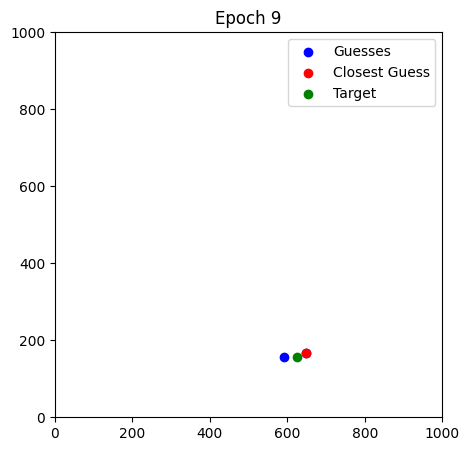

Epoch 9: Closest guess is (648.1203220126868, 166.76382137026448) with distance 26.413060869324926


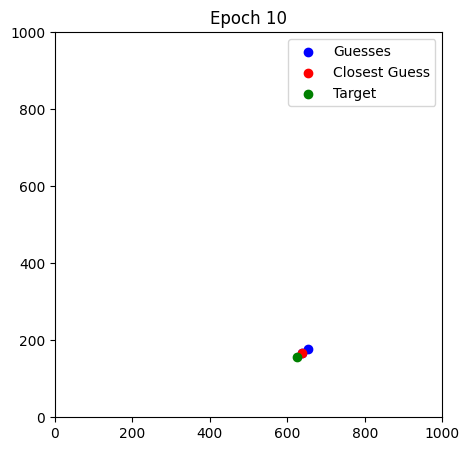

Epoch 10: Closest guess is (637.7676065027864, 166.81743801867427) with distance 17.508967819475423


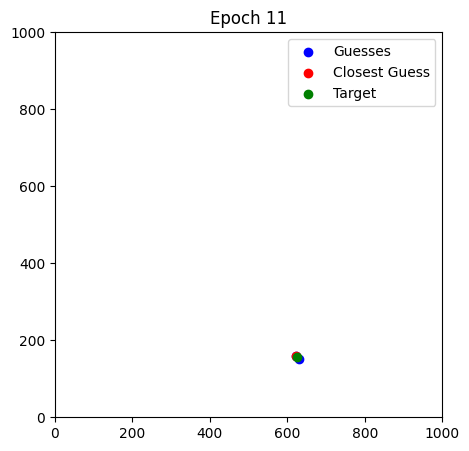

Epoch 11: Closest guess is (622.8861799969424, 159.6921214698736) with distance 3.8564693629682707


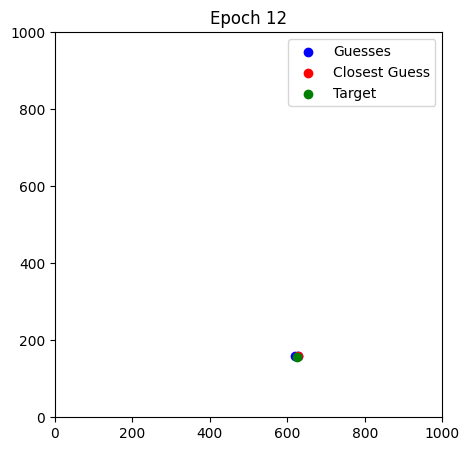

Epoch 12: Closest guess is (626.4121890072338, 159.7051261028465) with distance 4.421155419640208


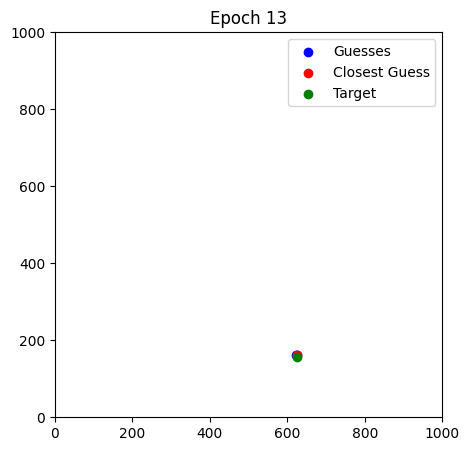

Epoch 13: Closest guess is (623.8875202286406, 160.542564436811) with distance 4.543956795739277


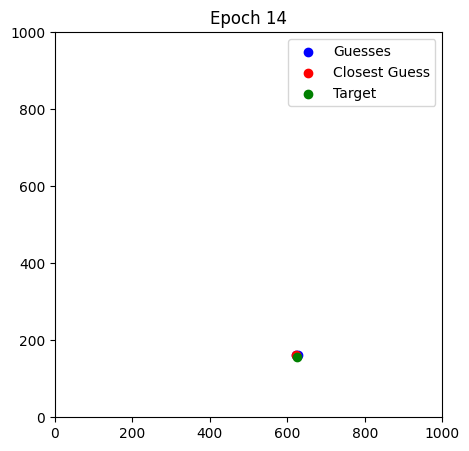

Epoch 14: Closest guess is (621.7571001635713, 162.60301056204602) with distance 6.973546311507744


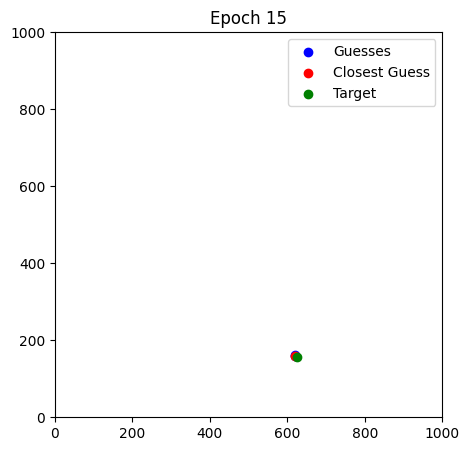

Epoch 15: Closest guess is (620.0839727020794, 157.98424196802927) with distance 4.3900439617101314


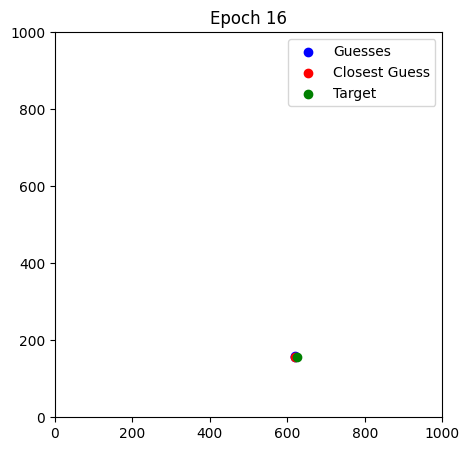

Epoch 16: Closest guess is (620.9997943139513, 156.00946777753205) with distance 3.000220624789205


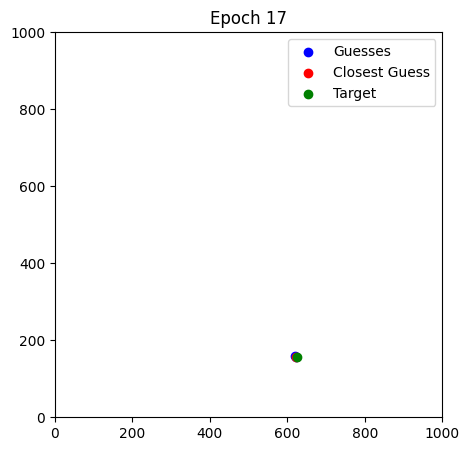

Epoch 17: Closest guess is (622.2557627324053, 156.5966208391975) with distance 1.8434533005831737


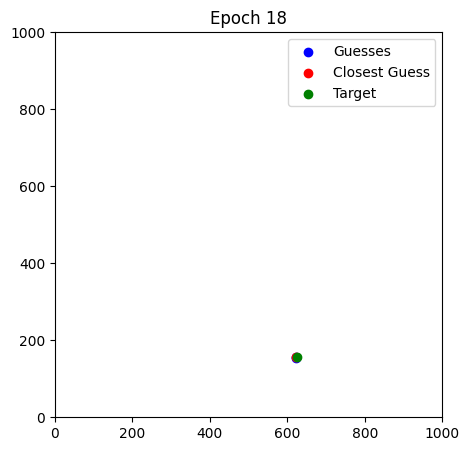

Epoch 18: Closest guess is (621.7307371507509, 156.0314445908058) with distance 2.269480698590134


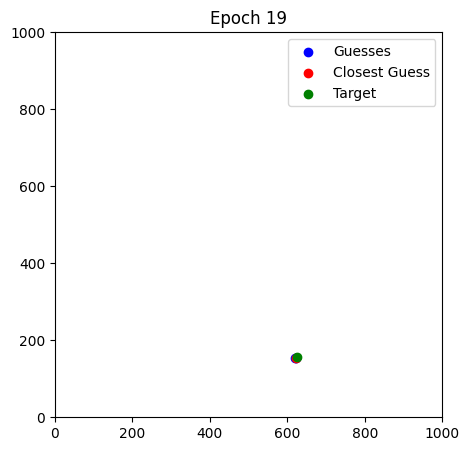

Epoch 19: Closest guess is (621.6324099694898, 154.7547353801209) with distance 2.6751012179156732


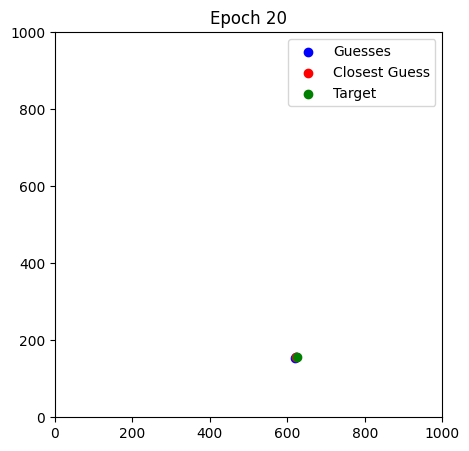

Epoch 20: Closest guess is (623.5030460722032, 156.28484506755345) with distance 0.5728000688391741


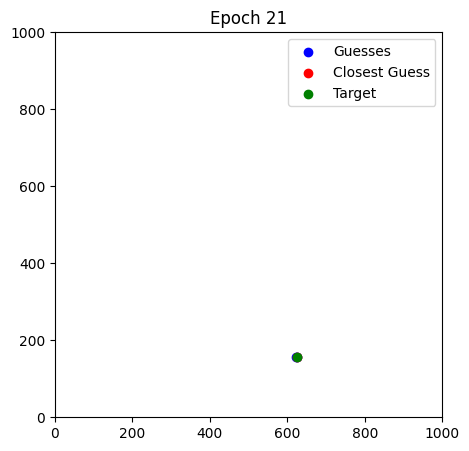

Epoch 21: Closest guess is (623.7336155005091, 155.77638469607464) with distance 0.34779951943415643


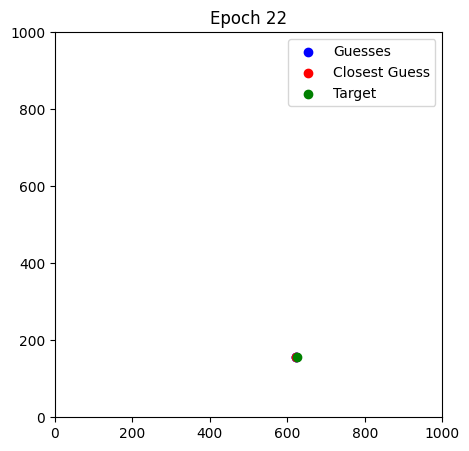

Epoch 22: Closest guess is (623.459342048762, 156.057485727782) with distance 0.5437054617488372


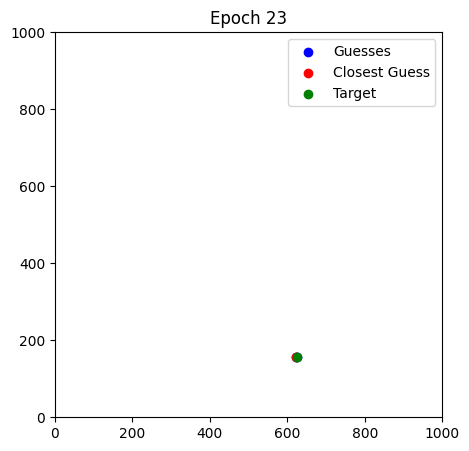

Epoch 23: Closest guess is (623.5718166155168, 155.92117789706143) with distance 0.4353779216486972


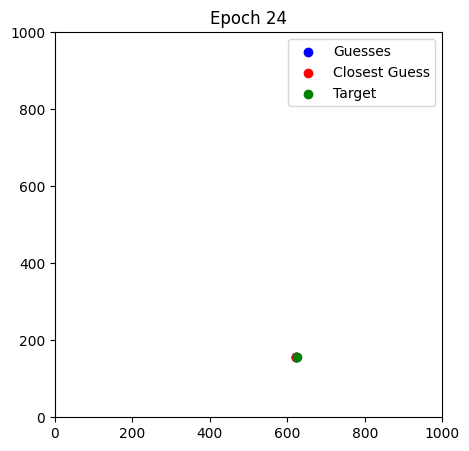

Epoch 24: Closest guess is (623.5434572074385, 155.58732454951317) with distance 0.6154123405282074


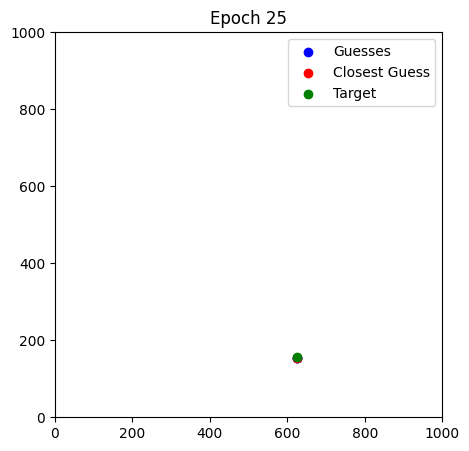

Epoch 25: Closest guess is (624.1039865702414, 155.12812629056904) with distance 0.8780529437268995


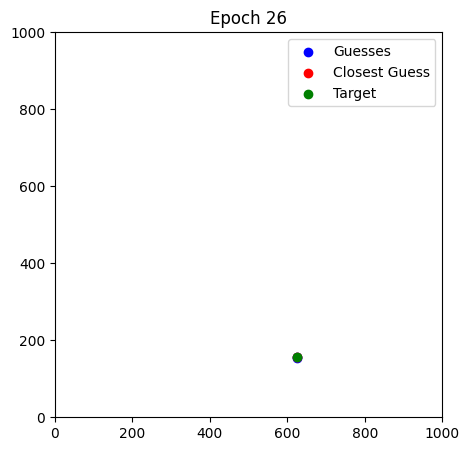

Epoch 26: Closest guess is (624.1051321257833, 155.84097538930106) with distance 0.19063470481435046


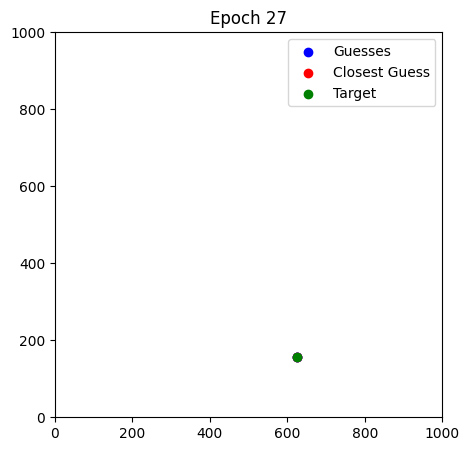

Epoch 27: Closest guess is (624.2826239373329, 155.9259650138589) with distance 0.2921600060351726


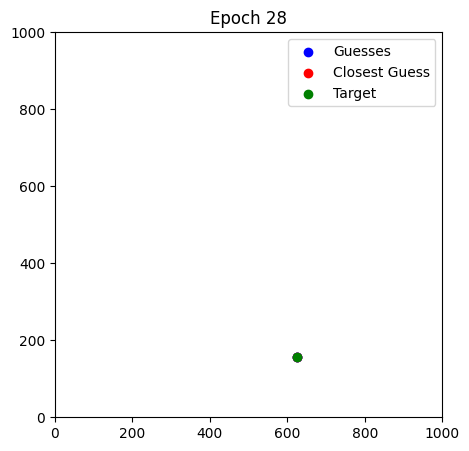

Epoch 28: Closest guess is (624.3612101424421, 155.8046807716441) with distance 0.41063653998227573


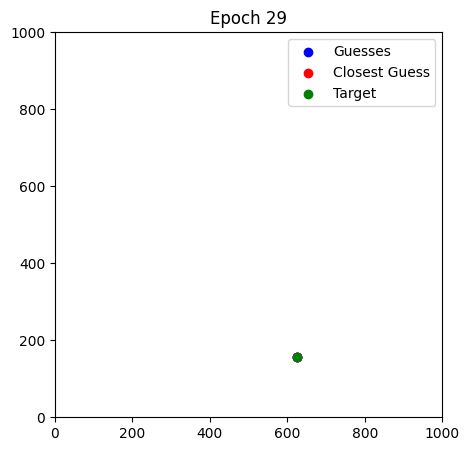

Epoch 29: Closest guess is (624.0170855052888, 155.9241170040743) with distance 0.07778266877418055


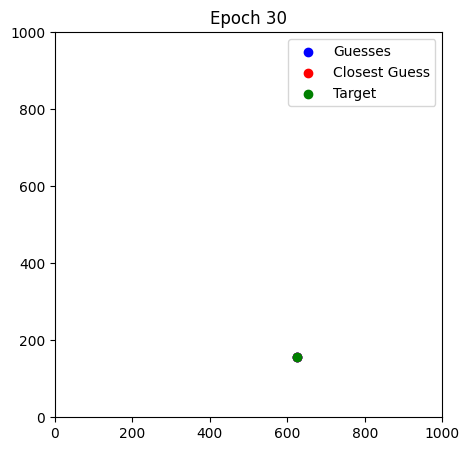

Epoch 30: Closest guess is (623.9612160162868, 155.87620970717066) with distance 0.1297236832326263


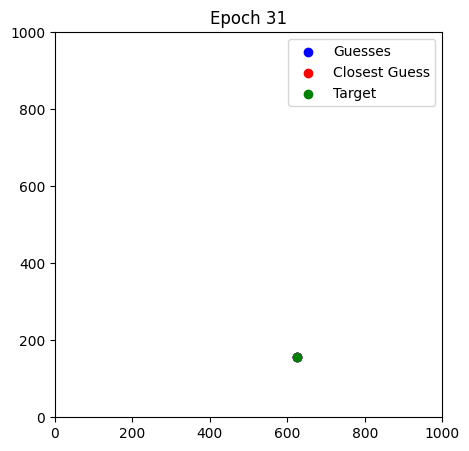

Epoch 31: Closest guess is (624.0267252214367, 155.8160876388725) with distance 0.1858440045746293


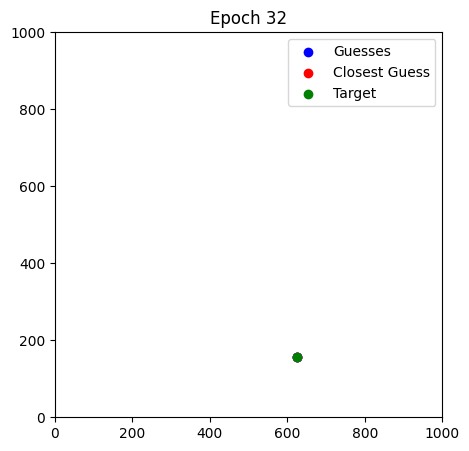

Epoch 32: Closest guess is (624.1299473808336, 155.94360116202589) with distance 0.1416585709032599


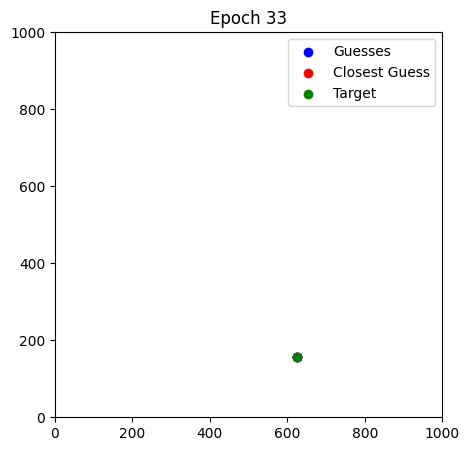

Epoch 33: Closest guess is (624.171996948296, 155.83244069837474) with distance 0.24012303051623532


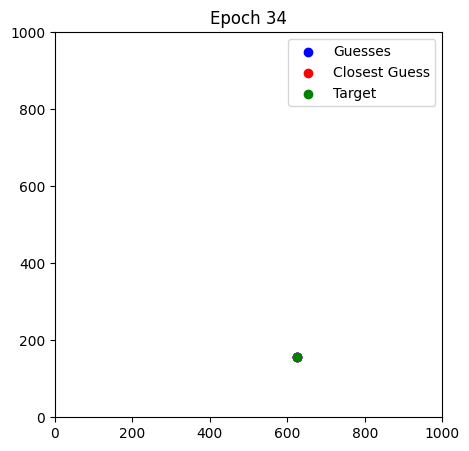

Epoch 34: Closest guess is (624.027846463044, 155.90324424821577) with distance 0.10068317142102466


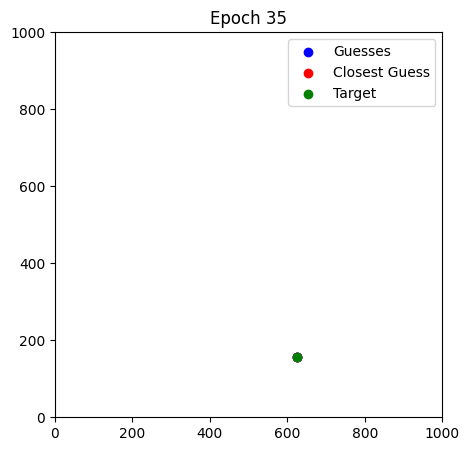

Epoch 35: Closest guess is (623.9664358385079, 155.83688714198115) with distance 0.16653034974966416


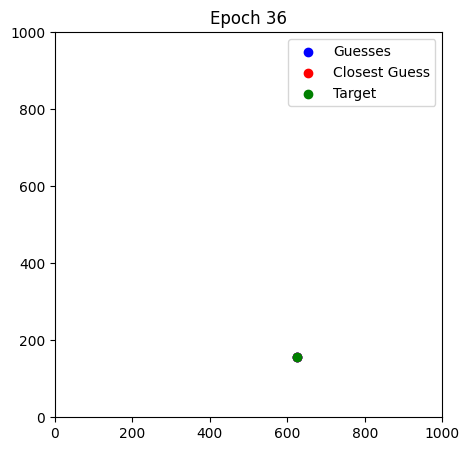

Epoch 36: Closest guess is (624.0177276753839, 155.72180729636375) with distance 0.2787569744974328


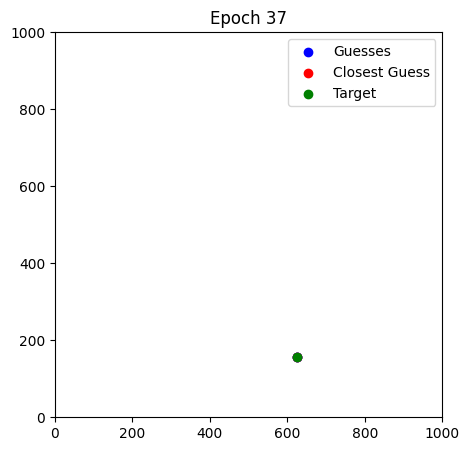

Epoch 37: Closest guess is (623.9419109736998, 155.60131251264167) with distance 0.40289706818566395


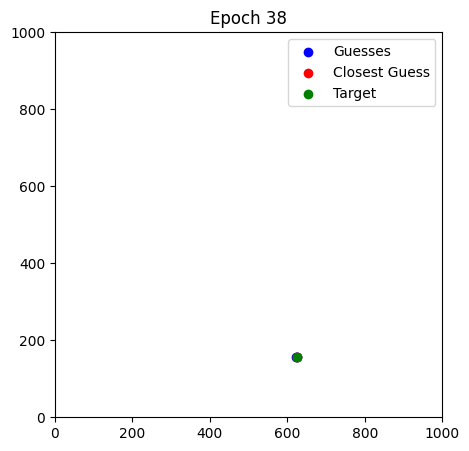

Epoch 38: Closest guess is (623.7010607571, 155.9660460946506) with distance 0.3008613279138947


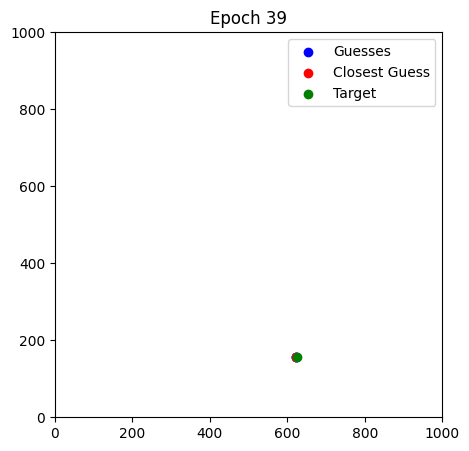

Epoch 39: Closest guess is (623.4929815118634, 155.6890808549298) with distance 0.5947591630933676


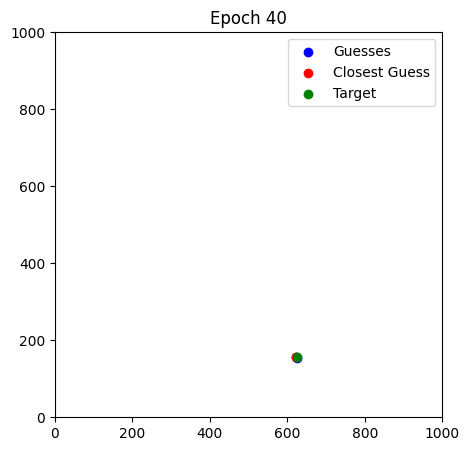

Epoch 40: Closest guess is (623.244010942485, 155.65729570695325) with distance 0.8300395698730517


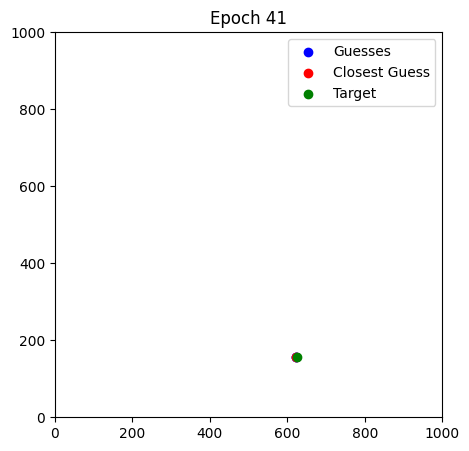

Epoch 41: Closest guess is (623.054611487391, 156.4039445911857) with distance 1.0280713362998333


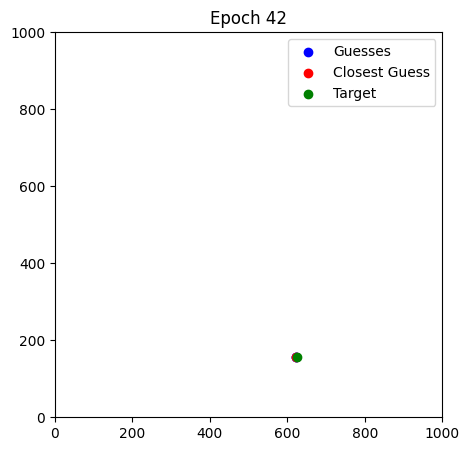

Epoch 42: Closest guess is (623.2299688884937, 155.53517367054081) with distance 0.8994506263526592


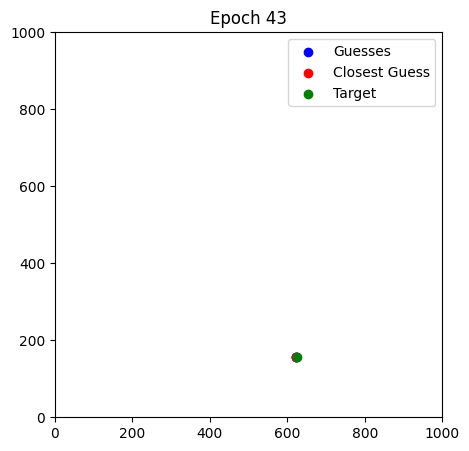

Epoch 43: Closest guess is (623.3777008441305, 156.15866589531916) with distance 0.6422079925797983


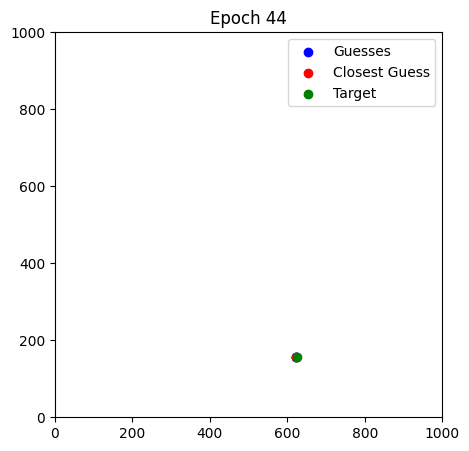

Epoch 44: Closest guess is (623.5138597046317, 155.81070784689294) with distance 0.5216933064633459


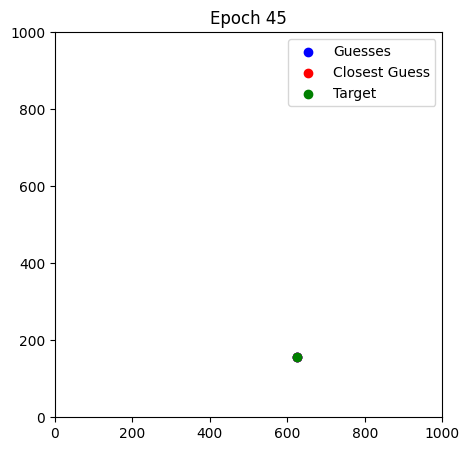

Epoch 45: Closest guess is (624.0017864943186, 156.31973472315755) with distance 0.31973971407159735


KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Set the target point
xt, yt = 624, 156  # Target coordinates

# Initialize search space
s = 1000
min_x, max_x = 0, s
min_y, max_y = 0, s



# Number of epochs and guesses
n_epochs = 1000
n_guesses = 2

result_errors = []

for epoch in range(n_epochs):
    # Generate random guesses
    guesses_x = np.random.uniform(min_x, max_x, n_guesses)
    guesses_y = np.random.uniform(min_y, max_y, n_guesses)
    
    # Calculate distances to the target point
    distances = np.sqrt((guesses_x - xt)**2 + (guesses_y - yt)**2)
    
    # Find the closest guess
    min_distance_idx = np.argmin(distances)
    closest_guess = (guesses_x[min_distance_idx], guesses_y[min_distance_idx])
    
    # Update search space based on the closest guess
    search_radius = distances[min_distance_idx]   # Reduce search radius
    min_x, max_x = max(0, closest_guess[0] - search_radius), min(s, closest_guess[0] + search_radius)
    min_y, max_y = max(0, closest_guess[1] - search_radius), min(s, closest_guess[1] + search_radius)
    
    # Optional: Plot current epoch's guesses and the closest guess
    plt.figure(figsize=(5, 5))
    plt.scatter(guesses_x, guesses_y, color='blue', label='Guesses')
    plt.scatter(closest_guess[0], closest_guess[1], color='red', label='Closest Guess')
    plt.scatter(xt, yt, color='green', label='Target')
    plt.xlim(0, s)
    plt.ylim(0, s)
    plt.title(f'Epoch {epoch+1}')
    plt.legend()
    plt.show()

    print(f"Epoch {epoch+1}: Closest guess is {closest_guess} with distance {np.min(distances)}")

    result_errors.append(np.min(distances))


In [223]:
print(distances)

[2.06733991 1.53943135 1.73490673]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


([<matplotlib.axis.XTick at 0x284c6f670>,
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20')])

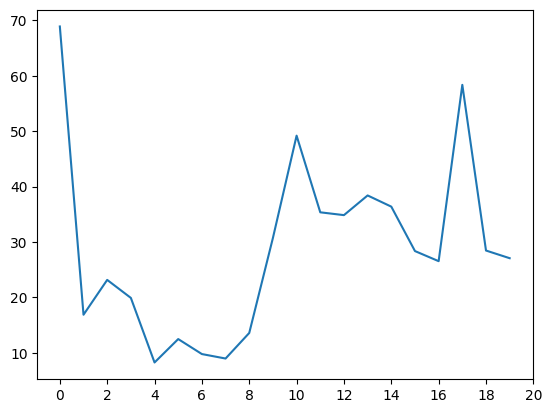

In [262]:
a = np.array([num for num, _ in enumerate(result_errors)]) * 1
b = [err for _, err in enumerate(result_errors)]
print(a)

plt.plot(a, b)
plt.xticks(np.linspace(0, 20, 11))

In [236]:
print(len(result_errors))

20


Epoch 1: Closest guess is (44.89526457393713, 95.56363129989118, 63.73562774226221) with distance 68.87895517451274


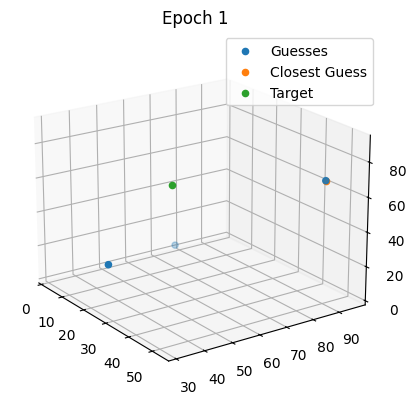

Epoch 2: Closest guess is (64.29706163047985, 42.646478718121905, 82.40440088050173) with distance 16.86632853715974


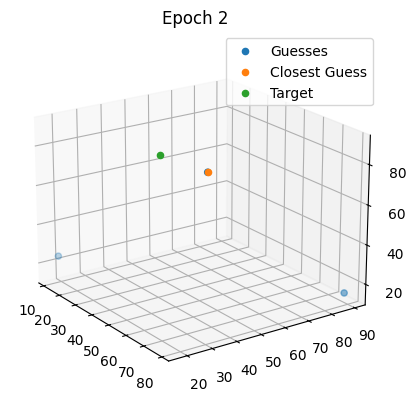

Epoch 3: Closest guess is (71.6923238797833, 36.36039829359409, 76.05260306966127) with distance 23.152778074720104


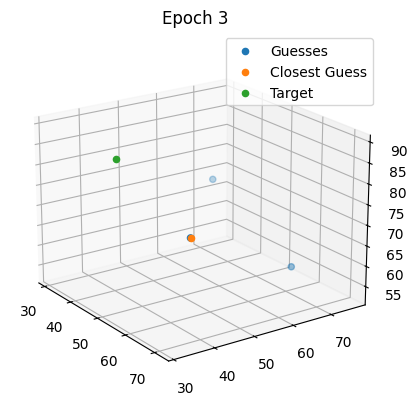

Epoch 4: Closest guess is (44.039371189318125, 47.84807266938712, 80.96197588274693) with distance 19.90135944418218


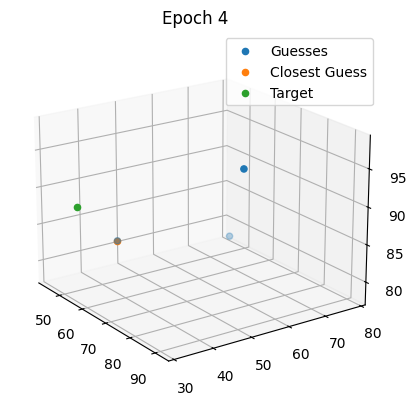

Epoch 5: Closest guess is (49.68548261854742, 24.449330995231914, 89.2972119427781) with distance 8.25148246259099


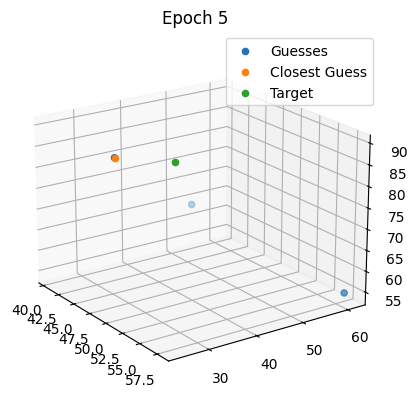

Epoch 6: Closest guess is (46.62271248771329, 21.27823615112128, 88.84726585326688) with distance 12.475950615687326


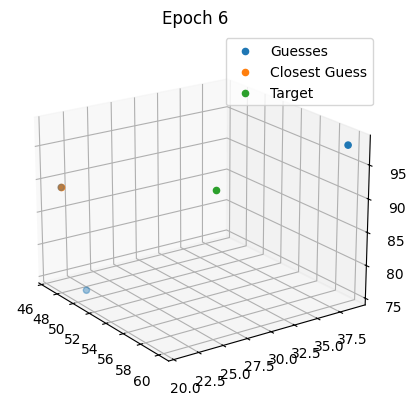

Epoch 7: Closest guess is (58.99590970412396, 24.37474425670045, 87.8367236636896) with distance 9.769783527046565


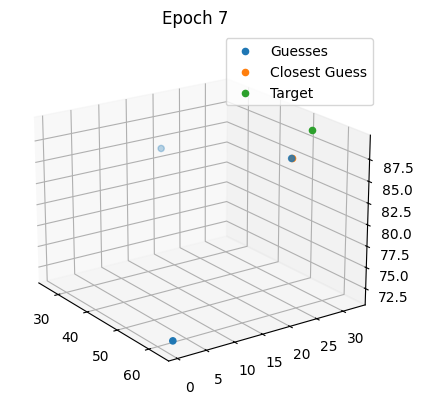

Epoch 8: Closest guess is (46.40034213482885, 25.95780462922841, 89.536729809437) with distance 8.963910292067151


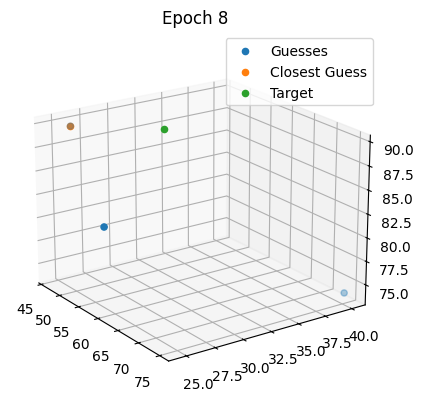

Epoch 9: Closest guess is (41.3345606454409, 28.643971868203955, 95.08397296785222) with distance 13.57792794316788


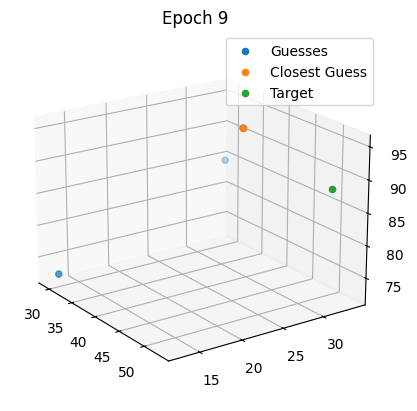

Epoch 10: Closest guess is (35.73386113512486, 6.626812255837474, 87.59331705872023) with distance 30.722906185759165


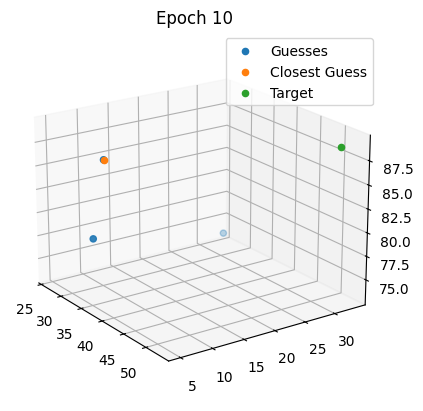

Epoch 11: Closest guess is (8.905386806919958, 43.75357454129413, 70.66902530247766) with distance 49.17830884146292


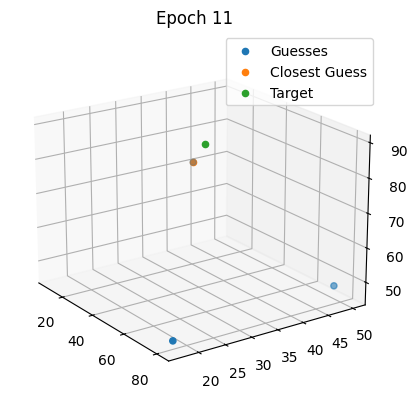

Epoch 12: Closest guess is (68.17322711214855, 1.712355376654917, 99.09267142192172) with distance 35.34728071942394


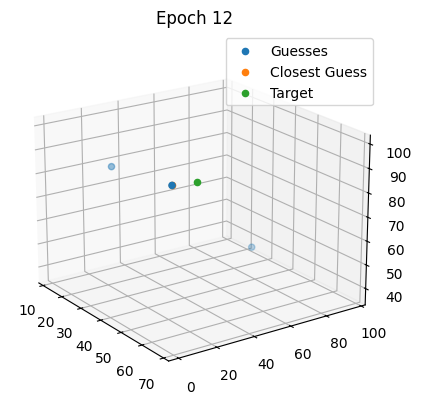

Epoch 13: Closest guess is (69.6462306059029, 50.67085870076211, 64.75030689543084) with distance 34.83885149763855


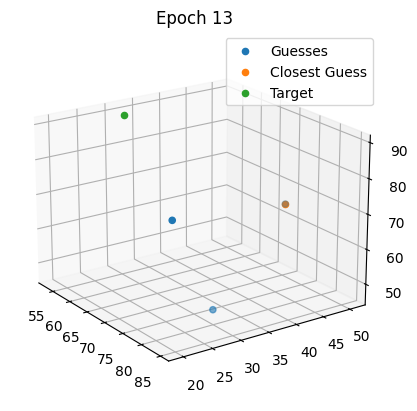

Epoch 14: Closest guess is (25.945237117900742, 5.610110632726362, 95.74328740634922) with distance 38.39086324202916


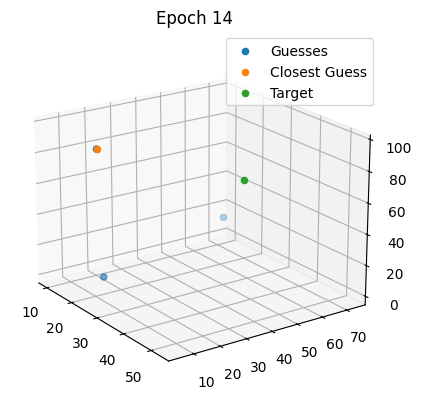

Epoch 15: Closest guess is (21.721517128388424, 14.381777181295549, 94.83666795128548) with distance 36.370481971136705


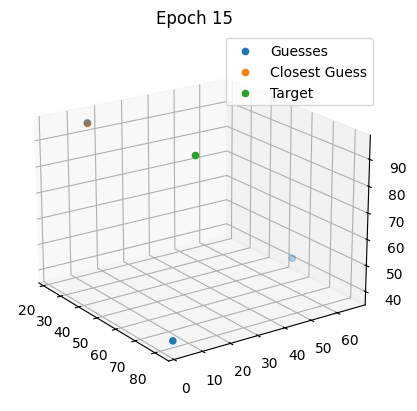

Epoch 16: Closest guess is (32.40130358458939, 12.53329136762934, 88.15119551347246) with distance 28.354532407504333


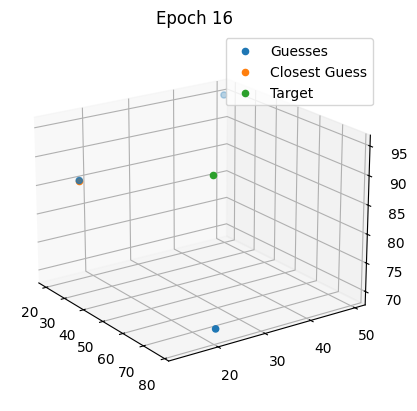

Epoch 17: Closest guess is (33.30977367723985, 35.00869489167985, 71.47529701702722) with distance 26.530595022240874


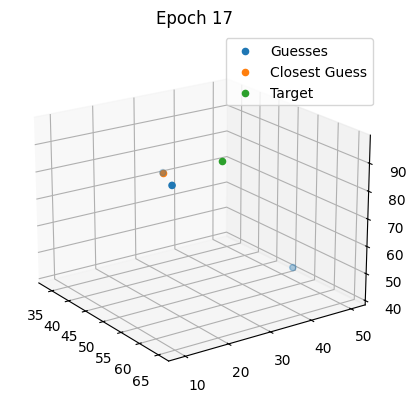

Epoch 18: Closest guess is (60.571257268371326, 63.851655087355894, 40.70584370483745) with distance 58.34532886777946


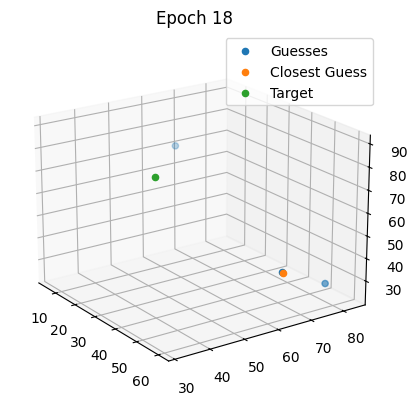

Epoch 19: Closest guess is (67.24006386615258, 22.47456749776188, 66.285504506696) with distance 28.451038448220594


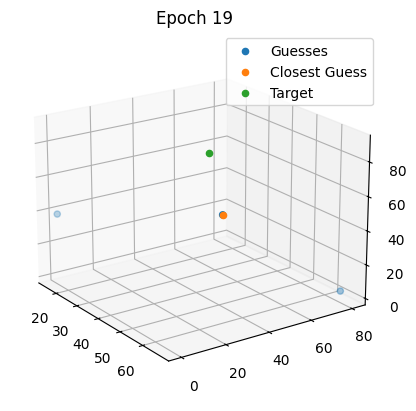

Epoch 20: Closest guess is (47.414351531858514, 29.40439469047591, 62.64350285130301) with distance 27.066613709175986


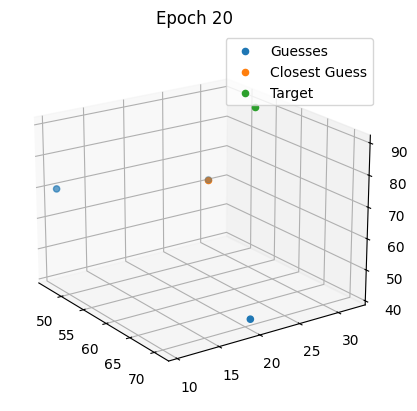

In [256]:
import numpy as np
import matplotlib.pyplot as plt

# Set the target point
xt, yt, zt = 53, 32, 89 # Target coordinates

# Initialize search space
s = 100
min_x, max_x = 0, s
min_y, max_y = 0, s
min_z, max_z = 0, s



# Number of epochs and guesses
n_epochs = 20
n_guesses = 3
learning_rate = 2  # Define the learning rate here

result_errors = []

for epoch in range(n_epochs):
    # Generate random guesses
    guesses_x = np.random.uniform(min_x, max_x, n_guesses)
    guesses_y = np.random.uniform(min_y, max_y, n_guesses)
    guesses_z = np.random.uniform(min_z, max_z, n_guesses)
    
    # Calculate distances to the target point
    distances = np.sqrt((guesses_x - xt)**2 + (guesses_y - yt)**2 + (guesses_z - zt)**2)
    
    # Find the closest guess
    min_distance_idx = np.argmin(distances)
    closest_guess = (guesses_x[min_distance_idx], guesses_y[min_distance_idx], guesses_z[min_distance_idx])
    
    # Update search space based on the closest guess
    search_radius = distances[min_distance_idx] * learning_rate  # Apply learning rate here
    min_x, max_x = max(0, closest_guess[0] - search_radius), min(s, closest_guess[0] + search_radius)
    min_y, max_y = max(0, closest_guess[1] - search_radius), min(s, closest_guess[1] + search_radius)
    min_z, max_z = max(0, closest_guess[2] - search_radius), min(s, closest_guess[2] + search_radius)
    
    print(f"Epoch {epoch+1}: Closest guess is {closest_guess} with distance {np.min(distances)}")
    result_errors.append(np.min(distances))
    # Optional: Plot current epoch's guesses and the closest guess
    ax = plt.figure().add_subplot(projection='3d')

    ax.scatter(guesses_x, guesses_y, guesses_z, 'bx', label='Guesses')
    ax.scatter(closest_guess[0], closest_guess[1], closest_guess[2], 'r+', label='Closest Guess')
    ax.scatter(xt, yt, zt, 'gt', label='Target')
    plt.title(f'Epoch {epoch+1}')
    ax.legend()
    ax.view_init(elev=20., azim=-35, roll=0)

    plt.show()


    